# データ分析入門

## 第9章 仮説検定 #11


### パッケージ読み込み

In [70]:
# !pip install japanize_matplotlib
# !pip install sympy

%matplotlib inline
import japanize_matplotlib
from matplotlib import pyplot as plt

import pandas as pd
from pathlib import Path
import math
import numpy as np

import sympy as sym


### 正規分布の数値計算

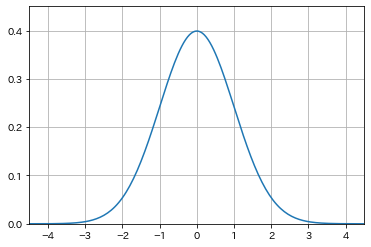

In [71]:
# https://rinsaka.com/python/statistics/01-norm.html
# 横軸用のnumpy配列を準備

from scipy.stats import norm
from scipy.stats import t

x_step = 0.05
x_min = -5
x_max = x_step + 5
x = np.arange(x_min, x_max, x_step)
 
# 標準正規分布
y = norm.pdf(x)
 
# グラフを描く
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(0, 0.45)
ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(0.0, 0.5, 0.1))
ax.grid()
# plt.savefig('normal.png', dpi=300, facecolor='white')
plt.show()

### 例9.2

In [72]:
k=100
P_x_46=math.comb(100, 46)*(0.5**k)
P_x_46

0.05795839814029764

In [73]:
(53.5-50)/5

0.7

In [74]:
(1-norm.cdf(x = 0.7))*2

0.48392730444614607

In [75]:
Px665=(1-norm.cdf(x = (66.5-50)/5))*2
Px665

0.000966848284767563

### 例9.3 

In [76]:
Data=np.array([23.5, 25.1,24.8,25.6,24.4,23.6])
Data


array([23.5, 25.1, 24.8, 25.6, 24.4, 23.6])

In [77]:
sigma=0.6
xhat=24
n=6

In [78]:
z1=(24.5-24)/(0.6/math.sqrt(6))
z1

2.0412414523193148

In [79]:
wfn=norm.isf(q = 0.025)*sigma/math.sqrt(n)
z_alpha=norm.isf(q = 0.025)
display(wfn)
display(z_alpha)

0.4800911676355311

1.9599639845400545

In [80]:
if abs(z1)>=z_alpha:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）')

有意水準5%の両側検定によって帰無仮説H0は棄却される


In [81]:
z_alpha=norm.isf(q = 0.005)
display(z_alpha)

2.575829303548901

In [82]:
if abs(z1)>=z_alpha:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）')

有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）


In [83]:
Pval=(1-norm.cdf(x =z1))*2
Pval

0.041226833337163704

### 例9.4

In [32]:
t1=(24.5-24)/(0.83/math.sqrt(6))
t1


1.475596230592276

In [36]:
from scipy.stats import t
t.pdf(x = 0, df = 5)

0.3794643728945254

In [84]:
t6=t.isf(q = 0.025, df = 5)
display(t6)

2.57058183661474

In [85]:
if abs(t1)>=t6:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）')

有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）


In [45]:
Pval=(1-t.cdf(x =t1, df = 5))*2
Pval

0.20007386122114346

### 例9.5

In [128]:
# https://rinsaka.com/python/statistics/03-student-t.html

In [54]:
sigma=2.7
xhat=27.1
n=10

In [47]:
t2=(27.1-24.6)/(2.7/math.sqrt(10))
t2

2.928034870526277

In [55]:
t9=t.isf(q = 0.050, df = 9)
display(t9)

1.8331129326536337

In [61]:
if abs(t2)>=t9:
    print('有意水準5%の片側検定によってH0は帰無仮説棄却される')
else:
    print('有意水準5%の片側検定によってH0は帰無仮説棄却されない（採択される）')

有意水準5%の片側検定によってH0は帰無仮説棄却される


In [58]:
t9b=t.isf(q = 0.010, df = 9)
display(t9b)

2.8214379233005498

In [60]:
if abs(t2)>=t9b:
    print('有意水準1%の片側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準1%の片側検定によって帰無仮説H0は棄却されない（採択される）')

有意水準1%の片側検定によって帰無仮説H0は棄却される


### 例9.7

In [62]:
z3=(0.45-0.5)/(0.0211)
z3

-2.3696682464454972

In [64]:
z_alpha=norm.isf(q = 0.025)
display(z_alpha)

if abs(z3)>=z_alpha:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）')

1.9599639845400545

有意水準5%の両側検定によって帰無仮説H0は棄却される


In [65]:
z_alpha=norm.isf(q = 0.005)
display(z_alpha)

if abs(z3)>=z_alpha:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却される')
else:
    print('有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）')

2.575829303548901

有意水準5%の両側検定によって帰無仮説H0は棄却されない（採択される）


In [67]:
Pval=(norm.cdf(x =z3))*2
Pval

0.017804052581261037

### 問題*

### 問題*

### 問題*

### 問題*

### その他